In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [56]:
#The columns are numbered
#Naming the column for more ease
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [57]:
n=df[['target','text']].copy()
n.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [26]:
#DATA CLEANING

In [58]:
import re
def clean_tweet(tweet):
  tweet = tweet.lower() #converts all the tweets into lowecase
  tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet) #removes URLS
  tweet = re.sub(r'@\w+', '', tweet) #removes mentions
  tweet = re.sub(r'#', '', tweet) #removes hashtags
  tweet = re.sub(r'[^A-Za-z\s]', '', tweet) #removes special characters
  return tweet

In [59]:
n['clean_text'] = n['text'].apply(clean_tweet) #creating another column for the cleaned tweet

In [60]:
n.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david car...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


In [37]:
#LABEL MAPPING

In [61]:
label_map = {0: "Negative", 2: "Neutral", 4: "Positive"}
n['sentiment'] = n['target'].map(label_map) #creating a new column called sentiment for these 3 labels
n.head()

,target,text,clean_text,sentiment
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david car...,Negative
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,Negative
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...,Negative
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,Negative
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...,Negative


In [62]:
#FEATURE EXTRACTION

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
tfidf = TfidfVectorizer(max_features=5000)

In [67]:
X_tfidf = tfidf.fit_transform(n['clean_text'])

In [69]:
print("TF-IDF Matrix Shape:", X_tfidf.shape) #rows for each tweet(1600000) and columns for each important word(5000)

TF-IDF Matrix Shape: (1600000, 5000)


In [77]:
#MODEL BUILDING

In [73]:
X = X_tfidf                        # Features: TF-IDF
y = n['sentiment']                 # Labels: -1 (Neg), 0 (Neutral), 1 (Pos)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [76]:
#Training the model using SVC (Linear Kernal)
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = svm_model.predict(X_test)

In [78]:
#MODEL EVALUATION

In [79]:
y_pred = svm_model.predict(X_test)

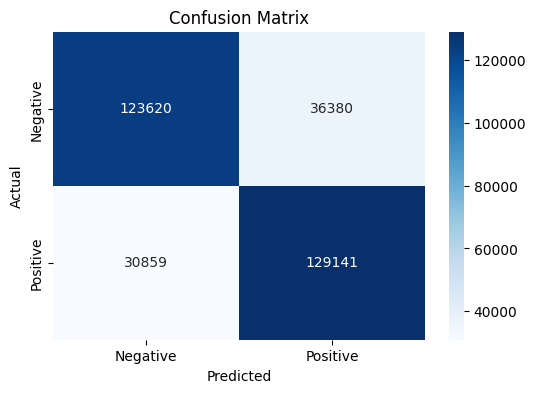

In [83]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [81]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.789878125


In [95]:
from sklearn.metrics import classification_report
cs = classification_report(y_test, y_pred, target_names=["Negative", "Positive"], output_dict=True)
for label in ["Negative", "Positive"]:
    print(f"\nClass: {label}")
    print(f"  Precision: {cs[label]['precision']:.2f}")
    print(f"  Recall:    {cs[label]['recall']:.2f}")
    print(f"  F1-Score:  {cs[label]['f1-score']:.2f}")



Class: Negative
  Precision: 0.80
  Recall:    0.77
  F1-Score:  0.79

Class: Positive
  Precision: 0.78
  Recall:    0.81
  F1-Score:  0.79
